##***Assignment 1) Delivery_Time***

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf


In [28]:
# Load Data Set
data = pd.read_csv ('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#EDA and Visualization 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


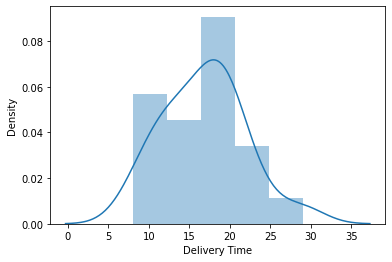

In [8]:
import seaborn as sns
sns.distplot(data['Delivery Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


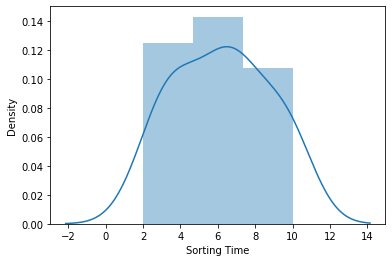

In [9]:

import seaborn as sns
sns.distplot(data['Sorting Time'])

In [34]:
# Renaming Columns
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#***Transformations***

##**Square Transformation**

In [35]:
arr1 =np.array(data['delivery_time'])
sq_value = np.square(arr1)                              
print(sq_value)

[441.     182.25   390.0625 576.     841.     235.6225 361.      90.25
 320.41   351.5625 393.2289 115.5625 278.2224 132.25   144.7209 221.4144
 189.0625 327.9721  64.     317.9089 462.25  ]


In [36]:
arr2 =np.array(dataset['sorting_time'])
sq_value = np.square(arr2)                              
print(sq_value)

[100  16  36  81 100  36  49   9 100  81  64  16  49   9   9  16  36  49
   4  49  25]


##**Log Transformation**

In [39]:
a = np.array(data['delivery_time'])
log_value =np.log(a)
print(log_value)

[3.04452244 2.60268969 2.98315349 3.17805383 3.36729583 2.73111547
 2.94443898 2.2512918  2.88480071 2.93119375 2.98719594 2.37490575
 2.8142104  2.44234704 2.48740353 2.70001803 2.62103882 2.89646427
 2.07944154 2.88088243 3.06805294]


In [40]:
b = np.array(data['sorting_time'])
log_value =np.log(b)
print(log_value)

[2.30258509 1.38629436 1.79175947 2.19722458 2.30258509 1.79175947
 1.94591015 1.09861229 2.30258509 2.19722458 2.07944154 1.38629436
 1.94591015 1.09861229 1.09861229 1.38629436 1.79175947 1.94591015
 0.69314718 1.94591015 1.60943791]


##**Square Root Transformation**

In [46]:
A = np.array(data['delivery_time'])
print(A)

[21.   13.5  19.75 24.   29.   15.35 19.    9.5  17.9  18.75 19.83 10.75
 16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 21.5 ]


In [42]:
sqrt = np.sqrt(A)
print(sqrt)

[4.58257569 3.67423461 4.44409721 4.89897949 5.38516481 3.9179076
 4.35889894 3.082207   4.23083916 4.33012702 4.45308882 3.27871926
 4.08411557 3.39116499 3.46842904 3.8574603  3.70809924 4.25558457
 2.82842712 4.22255847 4.63680925]


In [47]:
B = np.array(data['sorting_time'])
print(B)

[10  4  6  9 10  6  7  3 10  9  8  4  7  3  3  4  6  7  2  7  5]


In [44]:
sqrt = np.sqrt(B)
print(sqrt)  

[3.16227766 2.         2.44948974 3.         3.16227766 2.44948974
 2.64575131 1.73205081 3.16227766 3.         2.82842712 2.
 2.64575131 1.73205081 1.73205081 2.         2.44948974 2.64575131
 1.41421356 2.64575131 2.23606798]


In [45]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


## Model Building

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery~Sorting",data = data).fit()


In [ ]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [ ]:
print (model.tvalues , '/n', model.pvalues)

Intercept    3.823349
Sorting      6.387447
dtype: float64 /n Intercept    0.001147
Sorting      0.000004
dtype: float64


In [ ]:
(model.rsquared)

0.6822714748417231

## Predict for New Data Point

In [ ]:
new_data = pd.Series([8,10])
new_data

0     8
1    10
dtype: int64

In [ ]:
data_pred = pd.DataFrame(new_data,columns = ['Sorting'])
data_pred

,Sorting
0,8
1,10


In [ ]:
model.predict(data_pred) ## Following are the predicted value for Delivery Time ~ Sorting Time (8 & 10) respectively.

0    19.774893
1    23.072933
dtype: float64

In [ ]:
(model.rsquared)

0.6822714748417231

#***Assignment 2) Predicting Salary_Data***

In [11]:
# Import Libraries
import pandas as pd
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#EDA and Visualization

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [13]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


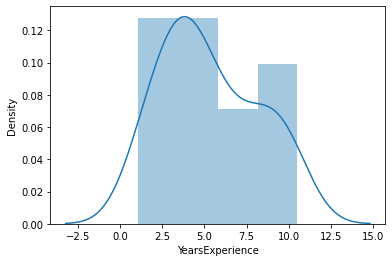

In [14]:
import seaborn as sns
sns.distplot(data["YearsExperience"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


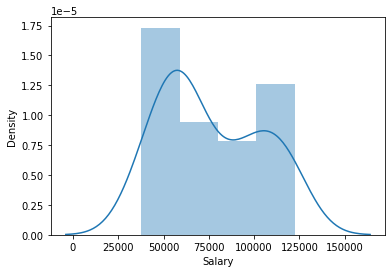

In [15]:
import seaborn as sns
sns.distplot(data["Salary"])

#***Transformations :***

##**Square Transformation**

In [16]:
sqre =np.array(data['YearsExperience'])
sq_value = np.square(sqre)
print(sq_value)

[  1.21   1.69   2.25   4.     4.84   8.41   9.    10.24  10.24  13.69
  15.21  16.    16.    16.81  20.25  24.01  26.01  28.09  34.81  36.
  46.24  50.41  62.41  67.24  75.69  81.    90.25  92.16 106.09 110.25]


In [17]:
sqre =np.array(data['Salary'])
sq_value = np.square(sqre)
print(sq_value)

[1.54787165e+09 2.13490202e+09 1.42362836e+09 1.89442562e+09
 1.59129188e+09 3.20831616e+09 3.61802250e+09 2.96425802e+09
 4.15315802e+09 3.27058172e+09 3.99651552e+09 3.11297044e+09
 3.24409985e+09 3.25824056e+09 3.73455432e+09 4.61557184e+09
 4.35982884e+09 6.90361574e+09 6.61993777e+09 8.82472360e+09
 8.41586064e+09 9.65758253e+09 1.02620952e+10 1.29531713e+10
 1.19751438e+10 1.11475587e+10 1.36817470e+10 1.26866432e+10
 1.49795569e+10 1.48527844e+10]


##**Log Transformation**

In [18]:
a =np.array(data['YearsExperience'])
log_value =np.log(a)
print(log_value)

[0.09531018 0.26236426 0.40546511 0.69314718 0.78845736 1.06471074
 1.09861229 1.16315081 1.16315081 1.30833282 1.36097655 1.38629436
 1.38629436 1.41098697 1.5040774  1.58923521 1.62924054 1.66770682
 1.77495235 1.79175947 1.91692261 1.96009478 2.06686276 2.10413415
 2.16332303 2.19722458 2.2512918  2.2617631  2.3321439  2.35137526]


In [19]:
b =np.array(data['Salary'])
log_value =np.log(b)
print(log_value)

[10.58007335 10.7408433  10.53823732 10.68109076 10.59390601 10.94450604
 11.00459672 10.9049463  11.07356743 10.95411685 11.05434435 10.92942162
 10.95005188 10.95222659 11.02044716 11.1263508  11.09784932 11.32765557
 11.3066759  11.45041156 11.42669197 11.4955046  11.52586143 11.64230324
 11.60304949 11.56724318 11.66966422 11.63190778 11.71497612 11.71072659]


##**Square root Transformation**

In [20]:
Sq =np.array(data['YearsExperience'])
print(Sq)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [21]:
Sqrt =np.sqrt(Sq)
print(Sqrt)

[1.04880885 1.14017543 1.22474487 1.41421356 1.4832397  1.70293864
 1.73205081 1.78885438 1.78885438 1.92353841 1.97484177 2.
 2.         2.02484567 2.12132034 2.21359436 2.25831796 2.30217289
 2.42899156 2.44948974 2.60768096 2.66458252 2.81069386 2.86356421
 2.94957624 3.         3.082207   3.09838668 3.20936131 3.24037035]


In [22]:
Sq1 =np.array(data['Salary'])
print(Sq1)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [23]:
Sqrt1 =np.sqrt(Sq1)
print(Sqrt1)

[198.35069952 214.95348334 194.24469105 208.62646045 199.72731411
 237.99579828 245.25496937 233.33452381 253.86019775 239.1422171
 251.43189933 236.20753587 238.65665715 238.91630334 247.2063915
 260.64918952 256.96108655 288.24989159 285.24200252 306.4963295
 302.88281562 313.48524686 318.27975116 337.36034147 330.80356709
 324.93383942 342.00730986 335.61138241 349.84425106 349.10170438]


Standardization

Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
sdata = scaler.fit_transform(data)

In [ ]:
sdata

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ],
       [-1.18749416, -1.20495739],
       [-1.11581443, -1.33978143],
       [-0.86493538, -0.71830716],
       [-0.82909552, -0.58815781],
       [-0.75741579, -0.79981746],
       [-0.75741579, -0.42881019],
       [-0.57821647, -0.69801306],
       [-0.50653674, -0.47433279],
       [-0.47069688, -0.74976858],
       [-0.47069688, -0.70662043],
       [-0.43485702, -0.70201994],
       [-0.29149756, -0.55250402],
       [-0.1481381 , -0.29921736],
       [-0.07645838, -0.37004264],
       [-0.00477865,  0.26285865],
       [ 0.21026054,  0.19885989],
       [ 0.2461004 ,  0.66547573],
       [ 0.53281931,  0.58377993],
       [ 0.6403389 ,  0.82623317],
       [ 0.92705781,  0.93861127],
       [ 1.03457741,  1.40274136],
       [ 1.21377673,  1.24020308],
       [ 1.32129632,  1.09740238],
       [ 1.50049564,  1.51986835],
       [ 1.5363355 ,  1.3590738 ],
       [ 1.78721455,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


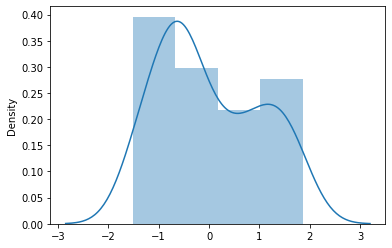

In [ ]:
sns.distplot(sdata)

In [24]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


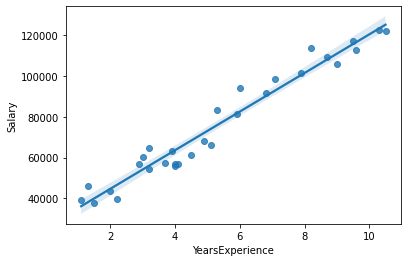

In [ ]:
sns.regplot(x=data['YearsExperience'], y=data['Salary'])

# Build the Model

In [ ]:
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model= smf.ols('Salary~YearsExperience',data=data).fit()

# Model Testing

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

# Find P Values 

In [ ]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

# Finding R squared Values

In [ ]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [ ]:
Salary=(25792.20)+(9449.96)*(5)
Salary

73042.0

In [ ]:
# Automatic Prediction for 4 & % YearsExperience

In [ ]:
new_data=pd.Series([4,5])
new_data

0    4
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data, columns=['YearsExperience'])
data_pred

,YearsExperience
0,4
1,5


# Final Model Prediction

In [ ]:
model.predict(data_pred)

0    63592.049484
1    73042.011806
dtype: float64

In [ ]:
(model.rsquared)

0.9569566641435086